In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Smarket.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Create dummy variable for Direction
direction_dummies = pd.get_dummies(df.Direction, prefix='Direction')
df['Direction_up'] = direction_dummies.Direction_Up
df.drop('Direction', axis=1, inplace=True)
print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  Direction_up
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959             1
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032             1
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623             0
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614             1
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213             1


In [3]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_up
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


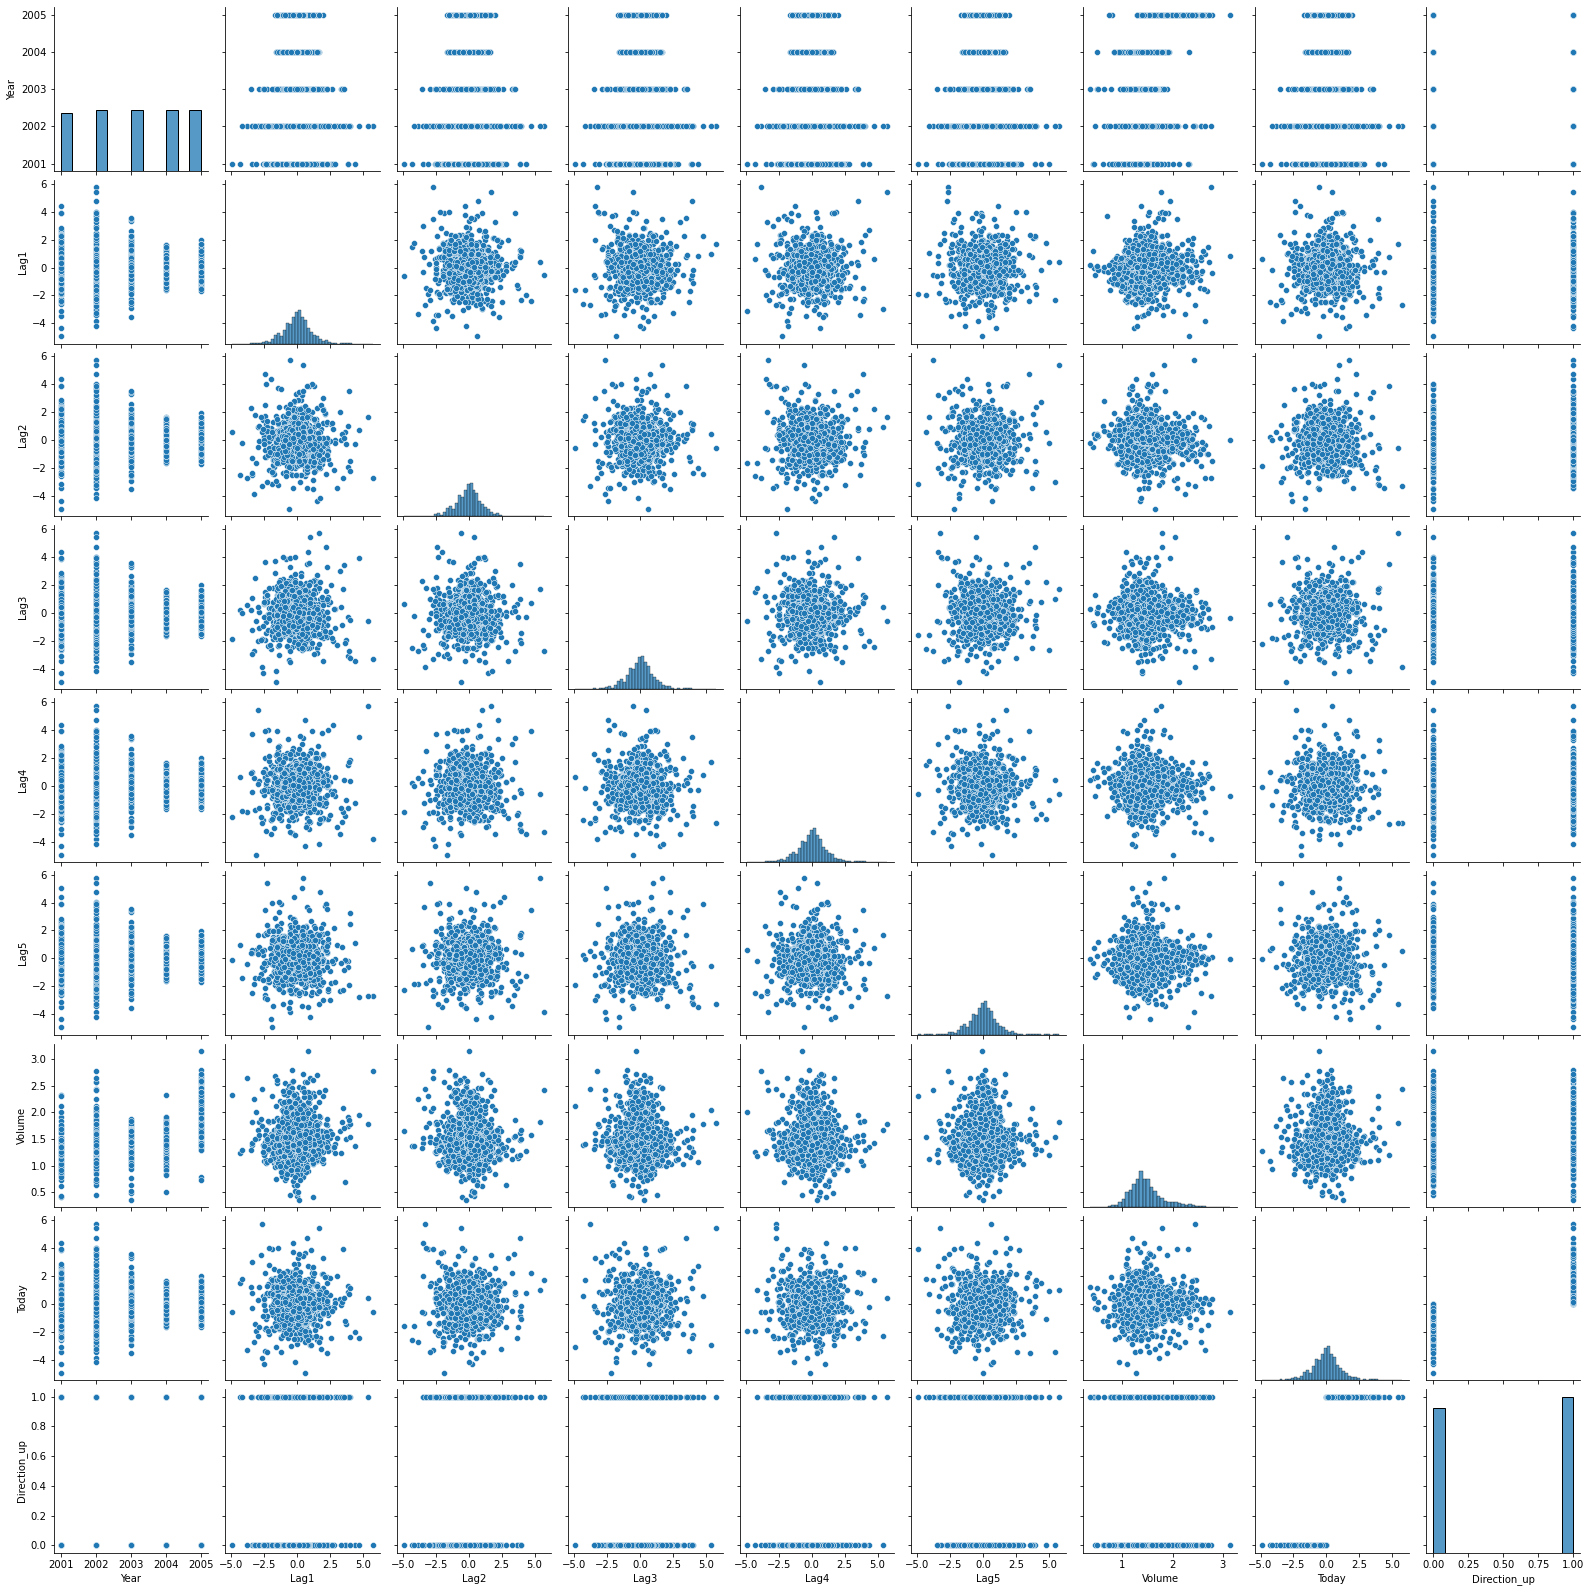

In [4]:
sns.pairplot(df)

<AxesSubplot:>

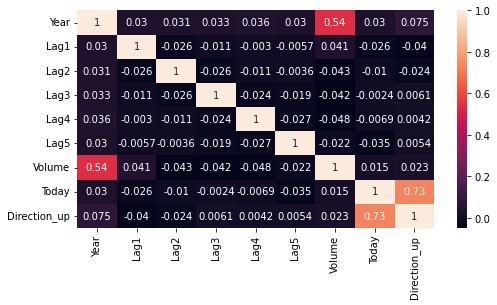

In [5]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True)

In [6]:
m01_columns = ' + '.join(df.columns[1:-2])
m01 = smf.logit(formula='Direction_up ~ {}'.format(m01_columns), data=df).fit()
print(m01.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                0.002074
Time:                        20:04:46   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [7]:
# Checking predicted values
m01.predict()[0:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [8]:
# Create confusion matrix
m01_preds = [1 if x > 0.5 else 0 for x in m01.predict()]
cm = confusion_matrix(m01_preds, df.Direction_up.values)
print(cm)

# Calculate accuracy
print('Prediction Accuracy: {:0.2f}%'.format(accuracy_score(m01_preds, df.Direction_up.values)*100))

[[145 141]
 [457 507]]
Prediction Accuracy: 52.16%


In [9]:
train_df = df.loc[df.Year < 2005, df.columns]
test_df = df.loc[df.Year >= 2005, df.columns]

In [10]:
m02 = smf.logit(formula='Direction_up ~ {}'.format(m01_columns), data=train_df).fit()
print(m02.summary())

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                0.001562
Time:                        20:04:46   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

In [11]:
## TRAIN DATA

print(' TRAIN '.center(60, '-'))

# Create confusion matrix
m02_train_preds = [1 if x > 0.5 else 0 for x in m02.predict()]
m02_train_cm = confusion_matrix(m02_train_preds, train_df.Direction_up)
print(m02_train_cm)

# Calculate accuracy
print('Prediction Accuracy: {:0.2f}%'.format(accuracy_score(m02_train_preds, train_df.Direction_up)*100))

## TEST DATA

print(' TEST '.center(60, '-'))

m02_test_preds = [1 if x > 0.5 else 0 for x in m02.predict(test_df)]
m02_test_cm = confusion_matrix(m02_test_preds, test_df.Direction_up)
print(m02_test_cm)

# Calculate accuracy
print('Prediction Accuracy: {:0.2f}%'.format(accuracy_score(m02_test_preds, test_df.Direction_up)*100))

-------------------------- TRAIN ---------------------------
[[175 156]
 [316 351]]
Prediction Accuracy: 52.71%
--------------------------- TEST ---------------------------
[[77 97]
 [34 44]]
Prediction Accuracy: 48.02%


In [12]:
m03 = smf.logit(formula='Direction_up ~ Lag1 + Lag2', data=train_df).fit()
print(m03.summary())

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:           Direction_up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                0.001347
Time:                        20:04:46   Log-Likelihood:                -690.70
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.3939
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.

In [13]:
## TRAIN DATA

print(' TRAIN '.center(60, '-'))

# Create confusion matrix
m03_train_preds = [1 if x > 0.5 else 0 for x in m03.predict()]
m03_train_cm = confusion_matrix(m03_train_preds, train_df.Direction_up)
print(m03_train_cm)

# Calculate accuracy
print('Prediction Accuracy: {:0.2f}%'.format(accuracy_score(m03_train_preds, train_df.Direction_up)*100))

## TEST DATA

print(' TEST '.center(60, '-'))

m03_test_preds = [1 if x > 0.5 else 0 for x in m03.predict(test_df)]
m03_test_cm = confusion_matrix(m03_test_preds, test_df.Direction_up)
print(m03_test_cm)

# Calculate accuracy
print('Prediction Accuracy: {:0.2f}%'.format(accuracy_score(m03_test_preds, test_df.Direction_up)*100))

-------------------------- TRAIN ---------------------------
[[168 160]
 [323 347]]
Prediction Accuracy: 51.60%
--------------------------- TEST ---------------------------
[[ 35  35]
 [ 76 106]]
Prediction Accuracy: 55.95%


In [14]:
data_raw = [
    (1.2, 1.1),
    (1.5, -0.8)
]

data_df = pd.DataFrame(data_raw, columns=['Lag1', 'Lag2'], index=[0, 1])

m03.predict(data_df)

0    0.479146
1    0.496094
dtype: float64